# Companion notebook of the paper _Fast sampling of $\beta$-ensembles_
by [Guillaume Gautier](http://guilgautier.github.io/), [Rémi Bardenet](https://rbardenet.github.io/), and [Michal Valko](http://researchers.lille.inria.fr/~valko/hp/)

See also the [arXiv preprint: 2003.02344](http://arxiv.org/abs/2003.02344) 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Companion-notebook-of-the-paper-Fast-sampling-of-$\beta$-ensembles" data-toc-modified-id="Companion-notebook-of-the-paper-Fast-sampling-of-$\beta$-ensembles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Companion notebook of the paper <em>Fast sampling of $\beta$-ensembles</em></a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#$V(x)-=-g_{2m}-x^{2m}$" data-toc-modified-id="$V(x)-=-g_{2m}-x^{2m}$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$V(x) = g_{2m} x^{2m}$</a></span><ul class="toc-item"><li><span><a href="#$V(x)-=-\frac{1}{2}-x^2$-(Hermite-ensemble)" data-toc-modified-id="$V(x)-=-\frac{1}{2}-x^2$-(Hermite-ensemble)-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>$V(x) = \frac{1}{2} x^2$ (Hermite ensemble)</a></span></li><li><span><a href="#$V(x)-=-\frac{1}{4}-x^4$" data-toc-modified-id="$V(x)-=-\frac{1}{4}-x^4$-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>$V(x) = \frac{1}{4} x^4$</a></span></li><li><span><a href="#$V(x)-=-\frac{1}{6}-x^6$" data-toc-modified-id="$V(x)-=-\frac{1}{6}-x^6$-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>$V(x) = \frac{1}{6} x^6$</a></span></li></ul></li><li><span><a href="#$V(x)-=-g_2-x^2-+-g_4-x^4$" data-toc-modified-id="$V(x)-=-g_2-x^2-+-g_4-x^4$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>$V(x) = g_2 x^2 + g_4 x^4$</a></span><ul class="toc-item"><li><span><a href="#$V(x)=-\frac{1}{4}-x^4-+-\frac{1}{2}-x^2$" data-toc-modified-id="$V(x)=-\frac{1}{4}-x^4-+-\frac{1}{2}-x^2$-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>$V(x)= \frac{1}{4} x^4 + \frac{1}{2} x^2$</a></span></li><li><span><a href="#$V(x)=-\frac{1}{4}-x^4---x^2$-(onset-of-two-cut-solution)" data-toc-modified-id="$V(x)=-\frac{1}{4}-x^4---x^2$-(onset-of-two-cut-solution)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>$V(x)= \frac{1}{4} x^4 - x^2$ (onset of two-cut solution)</a></span></li><li><span><a href="#$V(x)=-\frac{1}{4}-x^4---\frac{5}{4}-x^2$-(Two-cut-eigenvalue-distribution)" data-toc-modified-id="$V(x)=-\frac{1}{4}-x^4---\frac{5}{4}-x^2$-(Two-cut-eigenvalue-distribution)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>$V(x)= \frac{1}{4} x^4 - \frac{5}{4} x^2$ (Two-cut eigenvalue distribution)</a></span></li></ul></li><li><span><a href="#$V(x)-=-\frac{1}{20}-x^4---\frac{4}{15}x^3-+-\frac{1}{5}x^2-+-\frac{8}{5}x$" data-toc-modified-id="$V(x)-=-\frac{1}{20}-x^4---\frac{4}{15}x^3-+-\frac{1}{5}x^2-+-\frac{8}{5}x$-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>$V(x) = \frac{1}{20} x^4 - \frac{4}{15}x^3 + \frac{1}{5}x^2 + \frac{8}{5}x$</a></span></li></ul></li></ul></div>

## Summary 
We focus on sampling $\beta$-ensembles with $N$ points associated to polynomial potentials $V$ with even degree which take the form

$$
\begin{equation}
\label{eq:potential_V}
V(x) = \frac{g_6}{6} x^6 
    + \frac{g_4}{4} x^4 
    + \frac{g_3}{3} x^3 
    + \frac{g_2}{2} x^2
    + g_1 x
\end{equation}
$$

We derive a **fast but approximate procedure to generate samples from the targeted $\beta$-ensemble**. In other words, we wish to sample from $(x_{1},\dots, x_N)$ with joint distribution proportional to 

$$
\begin{equation}
\label{eq:joint_x}
\left|\Delta(x_1,\dots,x_N)\right|^{\beta}
    ~ \exp^{-\sum_{i=1}^N V(x_i)}
    \prod_{i=1}^N d x_i
\end{equation}
$$

where $\Delta(x_1,\dots,x_N) = \prod_{1\leq i < j \leq N} (x_j-x_i)$.

To do this we view $x_1, \dots, x_N$ as the eigenvalues of a random *Jacobi* matrix, i.e., a real-symmetric, tridiagonal matrix with positive subdiagonal

$$
\begin{equation}
\label{eq:jacobi_matrix_J_N_a_b}
J_{ab}=
\begin{bmatrix}
        a_1 		& \sqrt{b_1}& 0              &    0           \\
        \sqrt{b_1}  & a_2 		& \ddots         &    0           \\
        0    		& \ddots   	& \ddots      	 & \sqrt{b_{N-1}} \\
        0 			& 0 		& \sqrt{b_{N-1}} & a_{N}   
\end{bmatrix}
\end{equation}.
$$

---

To draw the correspondence with Jacobi matrices, we first augment the distribution of the points $x_1,\dots,x_N$ with auxilary weights $w_{1}, \dots, w_{N}$, distributed independently from the points as a Dirichlet $\operatorname{Dir}\left(\frac{\beta}{2}\right)$, so that

$$
\begin{equation}
\label{eq:joint_x_w}
    (x_{1:N}, w_{1:N-1})
    \sim
    \left|\Delta(x_1,\dots,x_N)\right|^{\beta}
        ~ \exp^{- \sum_{i=1}^N V(x_i)}
            \prod_{i=1}^N d x_i
    \prod_{i=1}^{N-1} w_i^{\frac{\beta}{2}-1} d w_i
\end{equation}
$$

This allows to consider the random measure $\mu = \sum_{n=1}^N w_n \delta_{x_n}$ supported on the targeted $\beta$-ensemble.
Taking for 
The corresponding Jacobi matrix $J_{ab}$ characterizes the three-term recurrence relation between orthonormal polynomials w.r.t. $\mu$ and Favard's theorem give that the mapping $\mu \mapsto J_{ab}$ is a diffeomorphism.
We can thus convert the distribution \eqref{eq:joint_x_w} of the nodes and weights of $\mu$ to the distribution of the entries of $J_{ab}$, namely

$$
\begin{equation}
\label{eq:joint_a_b}
    (a_{1:N}, b_{1:N-1})
    \sim
    \prod_{i=1}^{N-1}
    b_{i}^{\frac{\beta}{2}(N-i)-1}
    \exp^{-\operatorname{Tr}[V(J_N(a, b)]}
        d a_{1:N}, b_{1:N-1}
\end{equation}
$$
        
see, e.g., [[KrRiVi13, Proposition 2]](http://de.arxiv.org/pdf/1306.4832.pdf).

---

Hence, computing the eigenvalues of the Jacobi matrix $J_{ab}$ \eqref{eq:jacobi_matrix_J_N_a_b} with entries sampled from \eqref{eq:joint_a_b} provides a way to sample the corresponding $\beta$-ensemble \eqref{eq:joint_x} with $\mathcal{O}(N^2)$ complexity.
The question remains as to sample efficiently from \eqref{eq:joint_a_b}.

For specific potentials, namely $V(x)=x^2, x - \log(x), - \log(1-x) + \log(1+x)$ that are respectively associated to the Hermite, Laguerre and Jacobi ensembles, the stars align perfectly to make the entries of $J_{ab}$ independent with easy-to-sample distributions: Gaussian, Gamma, Beta.

But for more general potentials $V$, the Jacobi coefficients are no longer indenpendent and sampling from the distribution \eqref{eq:joint_a_b} remains a challenge.
Yet, when considering polynomials potentials, the interaction between the different parameters $a_n, b_n$ has short range, driven by the degree of $V$.
We exploit this short range of interaction using a Gibbs sampler on Jacobi matrices to generate fast but approximate samples from the targeted $\beta$ ensemble.

**After rescaling the polynomial potentials \eqref{eq:potential_V} as $V\leftarrow\frac{\beta N}{2} V$**,

for the chain of Jacobi matrices, we compare the empirical distribution of
- the eigenvalues to the expected equilibrium distribution
- the largest eigenvalue to the Tracy-Widom distribution, as expected for some potentials $V$ when $\beta=2$.

**Our empirical study seems to confirm the fast $\log(N)$ mixing time sugested by [[KrRiVi13, p.6]](http://de.arxiv.org/pdf/1306.4832.pdf).**

**Note:**
If you are interested in sampling exactly from the classical (Hermite, Laguerre and Jacobi) $\beta$-ensembles, please refer to the corresponding section in the [tutorial notebook of the DPPy toolbox](https://github.com/guilgautier/DPPy/tree/master/notebooks).

# Imports

**Here are the detailed [INSTALLATION INSTRUCTIONS](https://github.com/guilgautier/DPPy#installation) of DPPy**

To install the last version available on PyPI you can use [![PyPI version](https://badge.fury.io/py/dppy.svg)](https://badge.fury.io/py/dppy) 

In [1]:
# !pip install dppy

💣 **Note: The version available on PyPI might not be the latest version of DPPy.
Please consider forking or cloning DPPy using**

In [2]:
# !rm -r DPPy
# !git clone https://github.com/guilgautier/DPPy.git
# !pip install scipy --upgrade

# Then
# !pip install DPPy/. 
# OR
# !pip install DPPy/.['zonotope','trees','docs'] to perform a full installation.

💣 If you have chosen to clone the repo and now wish to interact with the source code while running this notebook.
You can uncomment the following cell.

In [3]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from dppy.beta_ensemble_polynomial_potential import BetaEnsemblePolynomialPotential

💻**You can play with the various parameters, e.g.,** $N, \beta, V$ `nb_gibbs_passes` 💻

## $V(x) = g_{2m} x^{2m}$

We first consider even monomial potentials whose equilibrium distribution can be derived from [[Dei00, Proposition 6.156]](https://bookstore.ams.org/cln-3)

### $V(x) = \frac{1}{2} x^2$ (Hermite ensemble)

This this the potential associated to the Hermite ensemble.

In this case, the Jacobi parameters are all independent and sampling is exact [[DuEd02, II C]](https://arxiv.org/abs/math-ph/0206043).

In our setting, this corresponds to a single pass of the Gibbs sampler over each variable.

In [5]:
beta, V = 2, np.poly1d([0.5, 0, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [6]:
sampl_x2 = be.sample_mcmc(N=1000, nb_gibbs_passes=1,
                          sample_exact_cond=True)

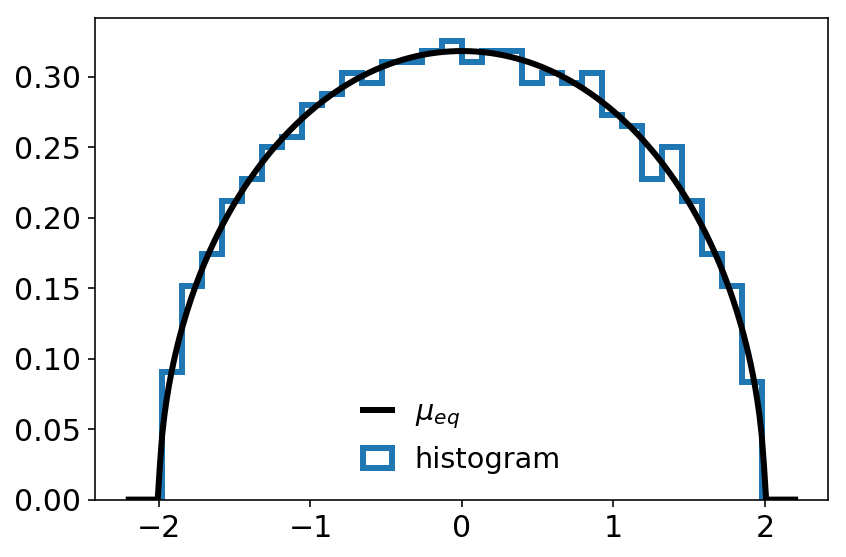

In [7]:
be.hist(sampl_x2)

### $V(x) = \frac{1}{4} x^4$

To depart from the classical quadratic potential we consider the quartic potential, which has been sampled by
[[LiMe13]](https://arxiv.org/abs/1306.1179)
[[OlNaTr15]](https://arxiv.org/abs/1404.0071)
[[ChFe19, Section 3.1]](https://arxiv.org/abs/1806.05985)

In [8]:
beta, V = 2, np.poly1d([1/4, 0, 0, 0, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [9]:
sampl_x4 = be.sample_mcmc(N=200, nb_gibbs_passes=10,
                          sample_exact_cond=True)
#                           sample_exact_cond=False,
#                           nb_mala_steps=100)

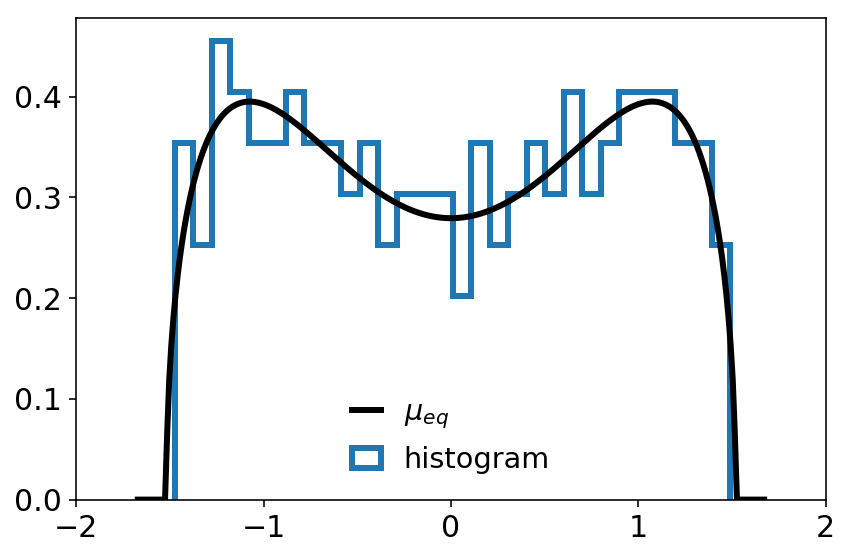

In [10]:
be.hist(sampl_x4)

### $V(x) = \frac{1}{6} x^6$

This is the first time the sextic ensemble is (approximately) sampled to the best of our knowledge.

In this case, the conditionals associated to the $a_n$ parameters are not $\log$-concave and we do not support exact sampling but perform a few steps (100 by defaults) of MALA.
For this reason, we set `sample_exact_cond=False`.

In [11]:
beta, V = 2, np.poly1d([1/6, 0, 0, 0, 0, 0, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [12]:
sampl_x6 = be.sample_mcmc(N=200, nb_gibbs_passes=10,
                          sample_exact_cond=False,
                          nb_mala_steps=100)

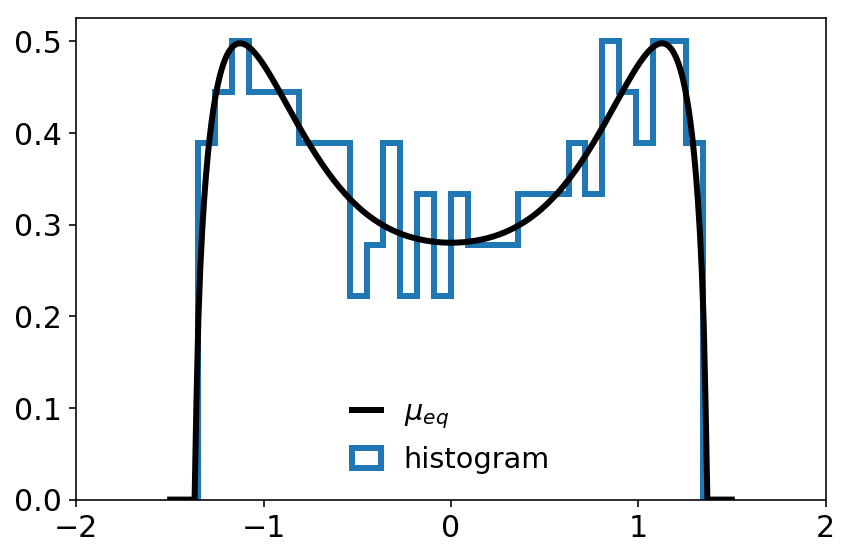

In [13]:
be.hist(sampl_x6)

## $V(x) = g_2 x^2 + g_4 x^4$

We consider quartic potentials where $g_2$ varies to reveal equilibrium distributions with support which are connected, about to be disconnect and fully disconnected.

We refer to
[[DuKu06, p.2-3]](https://arxiv.org/pdf/math/0605201.pdf),
[[Molinari, Example 3.3]](http://pcteserver.mi.infn.it/~molinari/RMT/RM2.pdf) and
[[LiMe13, Section 2]](https://arxiv.org/pdf/1306.1179.pdf)
for the exact shape of the corresponding equilibrium densities.

### $V(x)= \frac{1}{4} x^4 + \frac{1}{2} x^2$

This case reveals an equilibrium density with a connected support.

In [14]:
beta, V = 2, np.poly1d([1/4, 0, 1/2, 0, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [15]:
sampl_x4_x2 = be.sample_mcmc(N=1000, nb_gibbs_passes=10,
                             sample_exact_cond=True)
#                              sample_exact_cond=False,
#                              nb_mala_steps=100)

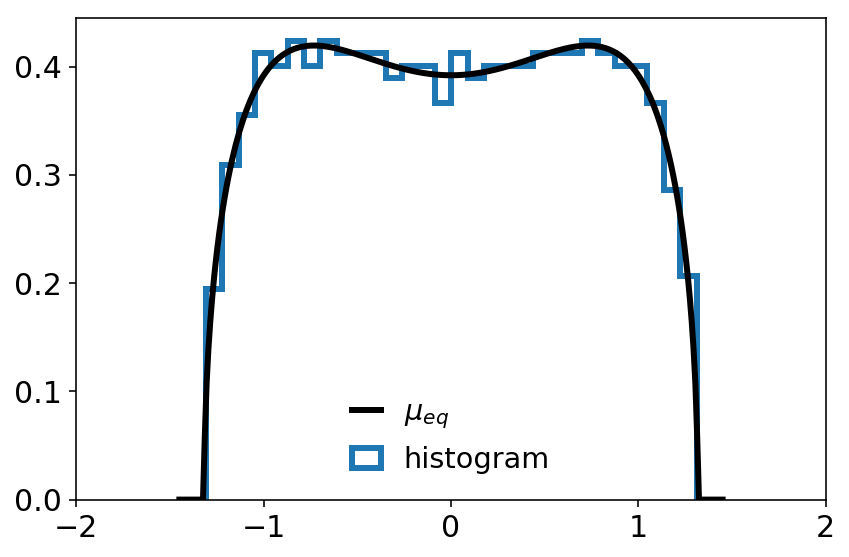

In [16]:
be.hist(sampl_x4_x2)

### $V(x)= \frac{1}{4} x^4 - x^2$ (onset of two-cut solution)

This case reveal an equilibrium density with support which is about to be disconnected.

The conditionals associated to the $a_n$ parameters are not $\log$-concave and we do not support exact sampling but perform a few steps (100 by defaults) of MALA.
For this reason, we set `sample_exact_cond=False`.

In [17]:
beta, V = 2, np.poly1d([1/4, 0, -1, 0, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [18]:
sampl_x4_x2_onset_2cut = be.sample_mcmc(N=1000, nb_gibbs_passes=10, 
                                        sample_exact_cond=False,
                                        nb_mala_steps=100)

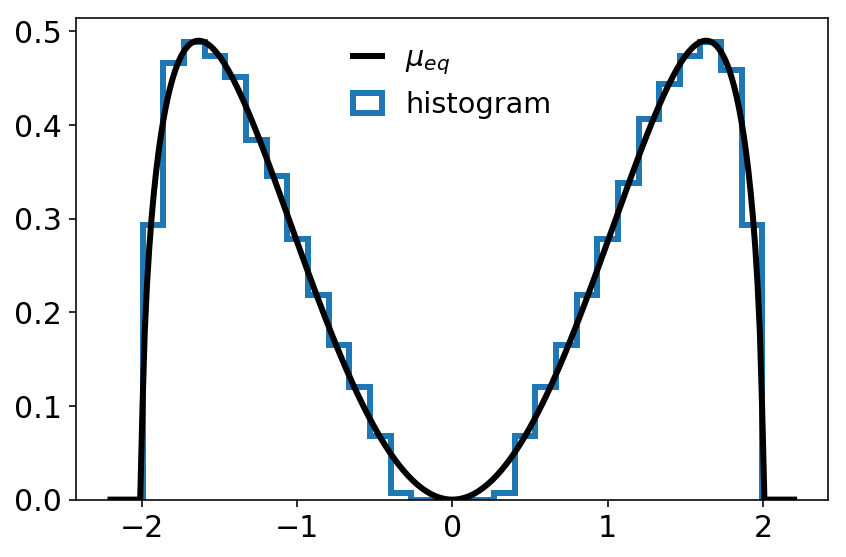

In [19]:
be.hist(sampl_x4_x2_onset_2cut)

### $V(x)= \frac{1}{4} x^4 - \frac{5}{4} x^2$ (Two-cut eigenvalue distribution)

This case reveals an equilibrium density with support having two connected components.

The conditionals associated to the $a_n$ parameters are not $\log$-concave and we do not support exact sampling but perform a few steps (100 by defaults) of MALA.
For this reason, we set `sample_exact_cond=False`.

In [20]:
beta, V = 2, np.poly1d([1/4, 0, -1.25, 0, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [21]:
sampl_x4_x2_2cut = be.sample_mcmc(N=200, nb_gibbs_passes=10,
                                  sample_exact_cond=False,
                                  nb_mala_steps=100)

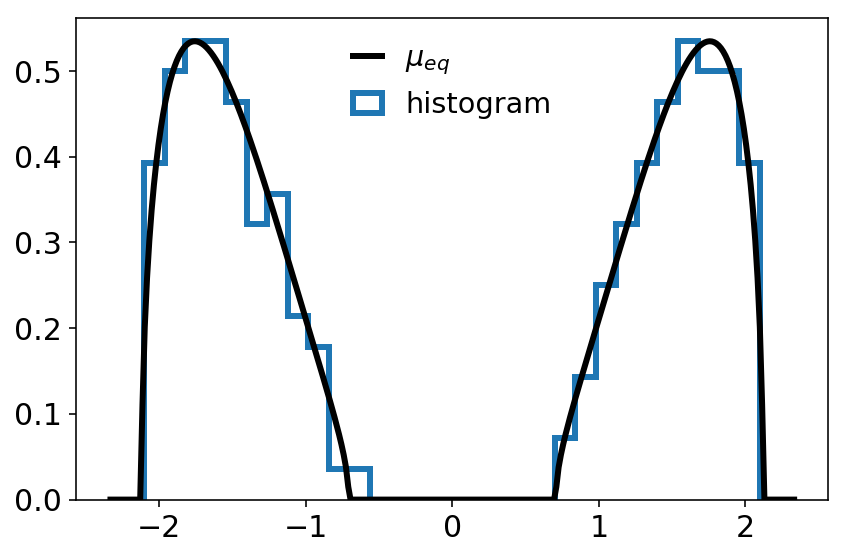

In [22]:
be.hist(sampl_x4_x2_2cut)

## $V(x) = \frac{1}{20} x^4 - \frac{4}{15}x^3 + \frac{1}{5}x^2 + \frac{8}{5}x$
    
This case reveals a singular behavior at the right edge of the support of the equilibrium density

The conditionals associated to the $a_n$ parameters are not $\log$-concave and we do not support exact sampling but perform a few steps (100 by defaults) of MALA.
For this reason, we set `sample_exact_cond=False`.

We refer to [[ClItsKr10, Example 1.2]](https://arxiv.org/abs/0901.2473)
[[OlNaTr14, Section 3.2]](https://arxiv.org/pdf/1404.0071.pdf) for the expression of the corresponding equilibrium density.

In [23]:
beta, V = 2, np.poly1d([1/20, -4/15, 1/5, 8/5, 0])
be = BetaEnsemblePolynomialPotential(beta, V)

In [24]:
sampl_x4_x3_x2_x = be.sample_mcmc(N=200, nb_gibbs_passes=10,
                                  sample_exact_cond=False,
                                  nb_mala_steps=100)

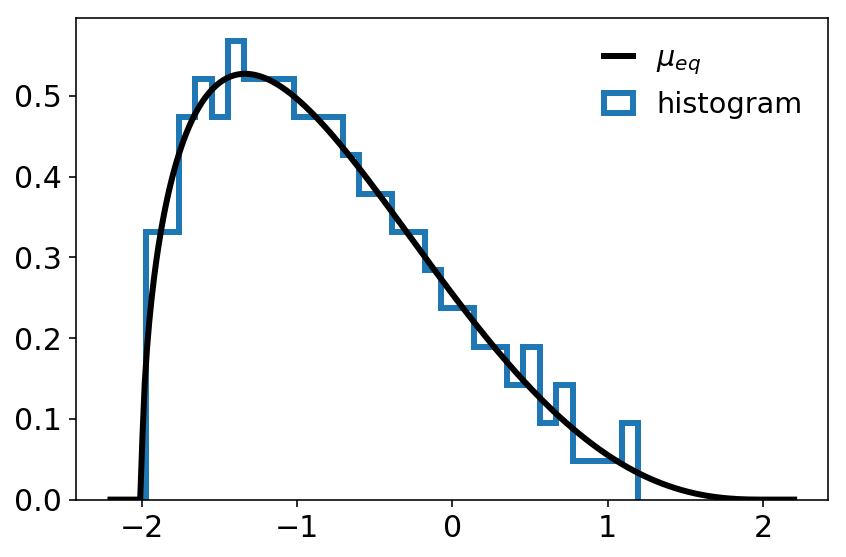

In [25]:
be.hist(sampl_x4_x3_x2_x)